In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as ma

-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.006241543123229931
-0.0062415

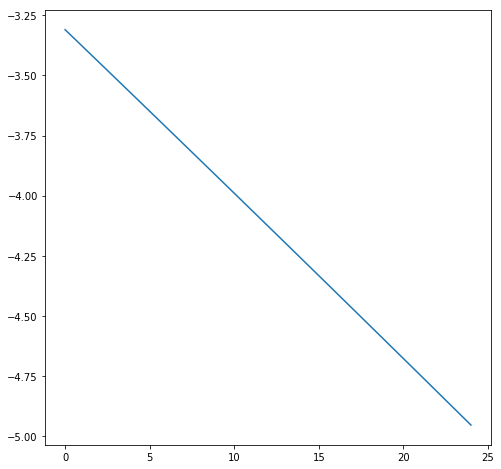

In [80]:


def get_T(c20,T,cloud_re,tree_rate):

    def get_Earth_temp(c20,T,cloud_re,tree_rate):
        plant_rate=tree_rate
        def tree_influ(g,k):

            c20=k
            plant_rate=g
            h1=ma.log(0.5*c20*0.28+0.05*ma.pow(0.28*c20/100,2))
            h2=ma.log(0.5*c20*plant_rate+0.05*ma.pow(plant_rate*c20/100,2))
            c20_sub=0.01*(h2-h1)
            print(c20_sub)
            return c20_sub
    
            
            
        totall_cloudAndparticle_reflectfactor=cloud_re
        ocean_t=T
        totall_h20=0.0025
        #co2单位ppm
        totall_co2=c20*(1-tree_influ(plant_rate,c20))
        totall_co2=totall_co2*ma.pow(10,-6)
        totall_radiation=1.7*10**17
        #云及颗粒物对大气的吸收及反射影响比例系数均为0.2,短波反射，长波吸收
        Shortwave_absorptionCoeff=0.15
        Longwave_absorptionCoeff_h20=0.8
        def get_co2_coff(n):
            return ma.log(1.2*n+0.005*ma.pow(n,2)+1.6*ma.pow(10,-6)*ma.pow(n,3))    
        Longwave_absorptionCoeff_c02=(get_co2_coff(c20)-get_co2_coff(291.4*(ma.pow(10,-6))))*3.3
        Longwave_absorptionCoeff_air=0
        land_noIce=103
        land_Ice=46
        ocean_noIce=335
        ocean_Ice=26
        h20_climate_changefactor=0.08
        c20_climate_changefactor=1
        Earth_R=6378.137*(10**3)
        Earth_S=ma.pi*Earth_R**2
        Earth_C=Earth_S/0.67
        M_Atmosphere=6000*10**15
        #进入到地面的辐射

        Earth_surface_radiation=totall_radiation*(1-Shortwave_absorptionCoeff-totall_cloudAndparticle_reflectfactor)
        #陆地及海洋受到辐射总和
        land_radiation=0.3*Earth_surface_radiation
        ocean_radiation=0.7*Earth_surface_radiation
        #陆地及海洋反射辐射,白天
        land_noIce_factor=land_noIce/(land_noIce+land_Ice)
        ocean_noIce_factor=ocean_noIce/(ocean_noIce+ocean_Ice)
        radiation_landReflect=land_radiation*(land_noIce_factor*0.18+(1-land_noIce_factor)*0.85)
        radiation_oceanReflect=ocean_radiation*(ocean_noIce_factor*0.07+(1-ocean_noIce_factor)*0.7)
        radiation_Reflect_daytime=radiation_landReflect+radiation_oceanReflect
        #白天辐射散热及大气吸收,短波吸收
        radiation_out_AtmosphereAbsorb_daytime=(totall_radiation+radiation_Reflect_daytime)*Shortwave_absorptionCoeff
    #     radiation_out_totall_daytime=radiation_totall_daytime*(1-0.15)

        #夜晚：陆地及海洋辐射经过大气被大气吸收的辐射，考虑云层吸收
        land_absorb_radiation=land_radiation-radiation_landReflect
        ocean_absorb_radiation=ocean_radiation-radiation_oceanReflect
        AtmosphereAbsorbFactor_night=(totall_h20*Longwave_absorptionCoeff_h20*h20_climate_changefactor+totall_co2*Longwave_absorptionCoeff_c02*c20_climate_changefactor+(1-totall_h20-totall_co2)*Longwave_absorptionCoeff_air)
        #陆地吸收系数由大气成分确定，海洋则将吸收热量辐射传热给大气

        def get_ocean_Ra(t,x):    
        #参数为海洋平均温度t，海洋吸收总辐射x
        #获得海洋发射辐射量
            factor=0.13*ma.log(1+1.5*pow(t-13.1/13.1,2))+0.32
            q_cloud=x*factor
            return q_cloud

        radiation_out_AtmosphereAbsorb_night=get_ocean_Ra(ocean_t,ocean_absorb_radiation)+land_absorb_radiation
    #     ocean_absorb_keep=radiation_out_AtmosphereAbsorb_night*0.7*0.5
        Atmosphere_absorb_keep=(radiation_out_AtmosphereAbsorb_daytime+radiation_out_AtmosphereAbsorb_night)*AtmosphereAbsorbFactor_night
        #夜晚，地球散热
        radiation_landdirct_out_space=(land_absorb_radiation+ocean_absorb_radiation)*(1-AtmosphereAbsorbFactor_night)
        radiation_out_space=radiation_out_AtmosphereAbsorb_night*0.5
        #总散热
    #     radiation_out_totall=radiation_landdirct_out_space+radiation_out_space+radiation_out_totall_daytime+radiation_in_AtmosphereReflect
        temp=Atmosphere_absorb_keep/Earth_C
        def get_cloud_reflect(t,x):
            #参数为海洋平均温度t，海洋吸收总辐射x
            #获得云总反射系数
            w=(2501.0-2382.5)/50
            qi=(2501-t*w)
            m0=44.8*ma.pow(10,12)
            u=2*0.2*0.51*x/(qi*m0)
            return u
        a=get_cloud_reflect(ocean_t,ocean_absorb_radiation)
    #     print('co2的气候系数为：%f'%(ma.pow(10,-6)*Longwave_absorptionCoeff_c02*c20_climate_changefactor))
    #     print('大气吸收辐射系数：%f'%AtmosphereAbsorbFactor_night)
        return temp,a,totall_cloudAndparticle_reflectfactor


    for i in range(10):
        
        team,Fore_clo,clo=get_Earth_temp(totall_h20,n,m,cloud_re)
        if abs(Fore_clo-clo)<=0.01:
            T,Fore_cloud=team,Fore_clo
            print('结果收敛！')
            break
        l=(clo+Fore_clo)/2
            
    T=team
    Fore_cloud=Fore_clo
    return T,Fore_cloud
            
        
co2=np.linspace(300,500,25)
T=np.linspace(18,25,25)
year_team=[]
year_T=[]
s=0
plant=np.linspace(0.28,0.14,25)
for n,m in zip(co2,T):
    tree=plant[s]
    temps,cloud_fa=get_T(n,m,0.15,tree)
    year_team.append(temps)
    year_T.append(cloud_fa)
    s+=1
plt.figure(figsize=(8,8))
plt.plot(year_team)
    

In [71]:

def get_co2_coff(n):
            return ma.log(1.2*n+0.005*ma.pow(n,2)+1.6*ma.pow(10,-6)*ma.pow(n,3))
   
    
co2=np.linspace(300,500,25)
for n in co2:
    n=n*ma.pow(10,-6)
    a=(get_co2_coff(n)-get_co2_coff(291.4*(ma.pow(10,-6))))*3.3
    print(a)


0.09598253520369412
0.1863992646076812
0.274404594562023
0.3601238142759852
0.4436726952073427
0.525158431338767
0.6046804661328584
0.6823312221696889
0.7581967468943819
0.8323572857893584
0.9048877925444989
0.9758583843568538
1.045334749292876
1.1133785116450725
1.1800475603760539
1.245396345036611
1.3094761429482051
1.372335300934652
1.4340194544579092
1.4945717266461074
1.554032909388093
1.6124416283992584
1.6698344939315661
1.726246238600393
1.781709843627584


In [6]:
44.8*ma.pow(10,13)/(365*24*60*60)

14205986.808726534

In [54]:
np.random.random()

array([0.84024721])

In [73]:
plant=np.linspace(0.2,0.2,25)

In [74]:
plant

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])